In [162]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import seaborn as sns
from ast import literal_eval
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors

In [163]:
fs = 22
s = 50

In [164]:
data = pd.read_csv('data_labelled.csv')
data

,Unnamed: 0.1,Unnamed: 0,material_id,elements,formula_pretty_reduced,formula,icsd_id,num_elements,chemsys,spacegroup_symbol,...,0.3,0.4,0.5,0.6,1e-05,0.0001,0.001,0.01,σ(RT)(S cm-1),Conductor?
0,0,0,mp-8892,"['Li', 'F', 'In']",LiInF4,Li4 In4 F16,[66693.0],3,F-In-Li,Pbcn,...,9.927689,9.927689,9.927689,9.927689,0.993939,0.981707,0.962025,0.788732,NaN,NaN
1,1,1,mp-772968,"['Li', 'Tl', 'P', 'H', 'O']",LiTlPHO3,Li4 Tl4 P4 H4 O12,[201040.0],5,H-Li-O-P-Tl,C2,...,11.140249,14.066884,14.066884,14.066884,1.000000,0.925000,0.725000,0.555556,NaN,NaN
2,2,2,mp-756951,"['Li', 'Sb', 'O']",LiSbO3,Li4 Sb4 O12,[nan],3,Li-O-Sb,C2/m,...,5.543978,5.543978,5.543978,6.903721,1.000000,0.993865,0.906832,0.560606,NaN,NaN
3,3,3,mp-754856,"['Li', 'Y', 'Zr', 'S']",Li7Y7ZrS16,Li7 Y7 Zr1 S16,[nan],4,Li-S-Y-Zr,P2/m,...,4.319241,4.319241,5.047983,5.047983,0.987952,0.962963,0.921569,0.735294,NaN,NaN
4,4,4,mp-24610,"['H', 'Li', 'O', 'P']",LiP(HO2)2,Li4 P4 H8 O16,"[182309.0, 182308.0, 100200.0]",4,H-Li-O-P,Pna2_1,...,32.155099,32.155099,32.155099,32.155099,1.000000,0.988506,0.941860,0.537500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,862,868,mp-9919,"['Li', 'Zn', 'Sb']",LiZnSb,Li2 Zn2 Sb2,"[642350.0, 42064.0]",3,Li-Sb-Zn,P6_3mc,...,7.108637,7.108637,7.108637,7.108637,0.987578,0.968750,0.876623,0.664286,NaN,NaN
863,863,869,mp-14704,"['Li', 'B', 'O', 'Y']",Li6Y(BO3)3,Li24 Y4 B12 O36,"[184290.0, 184288.0, 184285.0, 68653.0, 184287...",4,B-Li-O-Y,P2_1/c,...,6.508700,7.567257,11.272210,11.272210,1.000000,0.982143,0.812500,0.742574,NaN,NaN
864,864,870,mp-557756,"['Li', 'Zn', 'P', 'O']",Li4Zn(PO4)2,Li16 Zn4 P8 O32,[59640.0],4,Li-O-P-Zn,P2_1/c,...,8.758697,8.758697,8.758697,10.855064,1.000000,0.967480,0.811475,0.700935,NaN,NaN
865,865,871,mp-966801,"['Li', 'Ca', 'B', 'O']",LiCaBO3,Li8 Ca8 B8 O24,[nan],4,B-Ca-Li-O,Ibca,...,10.040524,10.040524,10.040524,10.040524,0.989011,0.933333,0.771084,0.735294,NaN,NaN


In [165]:
s = len(data)

s

867

In [166]:
fast_ion = [122, 861, 202, 860, 859, 608]
slow_ion = [295, 211, 191, 16, 40, 300, 181, 387]

In [167]:
#import temperature dependent and independent phonon band centre (average frequency) data

#fav = temperature independent
fav = data['fav'].tolist()
fav_tot = data['fav_tot'].tolist()

#fav_RT = temperature dependent (room temperature)
fav_RT = data['298'].tolist()
fav_RTot = data['298_tot'].tolist()

In [168]:
#calculate the difference between total and Li phonon band centre
d_fav = np.array(fav_tot) - np.array(fav)
d_favRT = np.array(fav_RTot) - np.array(fav_RT)

data['d_fav'] = d_fav.tolist()
data['d_favRT'] = d_favRT.tolist()

In [169]:
#Frequency of the first peak found in the DOS using scipy find_peaks() function
#Frequency of the first peak found in the DOS using scipy find_peaks() function
first_peak_005 = data['0.05'].to_numpy().reshape(s, 1)
first_peak_01 = data['0.1'].to_numpy().reshape(s, 1)
first_peak_02 = data['0.2'].to_numpy().reshape(s, 1)
first_peak_03 = data['0.3'].to_numpy().reshape(s, 1)
first_peak_04 = data['0.4'].to_numpy().reshape(s, 1)
first_peak_05 = data['0.5'].to_numpy().reshape(s, 1)
first_peak_06 = data['0.6'].to_numpy().reshape(s, 1)

In [170]:
#relative width  and spread
rel_s_05 = data['1e-05'].to_numpy().reshape(s, 1)
rel_s_04 = data['0.0001'].to_numpy().reshape(s, 1)
rel_s_03 = data['0.001'].to_numpy().reshape(s, 1)
rel_s_02 = data['0.01'].to_numpy().reshape(s, 1)

In [171]:
mat_idx = list(range(0, s))

# Phonon band-centre

### Distributions

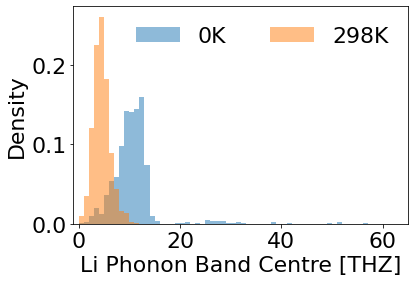

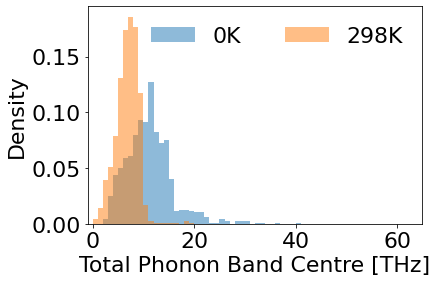

In [172]:
fig, ax = plt.subplots()
ax.hist(fav, label='0K',alpha=0.5, density=True, bins=np.arange(0, 65))
ax.hist(fav_RT, label='298K',alpha=0.5, density=True, bins=np.arange(0, 65))
ax.set_xlabel('Li Phonon Band Centre [THZ]', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.set_xlim(-1, 65)
ax.legend(frameon=False, ncol=2, fontsize=fs)
plt.show()

fig, ax = plt.subplots()
ax.hist(fav_tot, label='0K',alpha=0.5, density=True, bins=np.arange(0, 65))
ax.hist(fav_RTot, label='298K',alpha=0.5, density=True, bins=np.arange(0, 65))
ax.set_xlabel('Total Phonon Band Centre [THz]', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.set_xlim(-1, 65)
ax.legend(frameon=False, ncol=2, fontsize=fs)
plt.show()

### Scatter plots

In [173]:
d_list = [fav, fav_tot, fav_RT, fav_RTot]
xtitle = ['Li phonon band centre [THz]', 'Total phonon band centre [THz]',
          'Li phonon band centre at room temperature [THz]', 'Total phonon band centre at room temperature [THz]']
fn_suffix = ['li', 'tot', 'li_rt', 'tot_rt']


for j, descriptor in enumerate(d_list):
    #store feature vector into dataframe
    df = pd.DataFrame(columns = ['Index','Phonon Band Centre [THz]'])
    df['Index'] = mat_idx
    df['Phonon Band Centre [THz]'] = descriptor
    #add formulaes to be able to analyse later
    formulaes = []
    for i in [*range(0, s)]:
        formulaes.append(data.loc[i,'formula_pretty_reduced'])
    df['Formula'] = formulaes
    #add conductivity labels
    conductivity = []
    conductivity_log = []
    conductivity_verbose = []
    for i in [*range(0, s)]:
        conductivity.append(data.loc[i,'σ(RT)(S cm-1)'])
        conductivity_log.append(np.log(data.loc[i,'σ(RT)(S cm-1)']))
        if data.loc[i,'Conductor?'] == True:
            conductivity_verbose.append('Yes')
        elif data.loc[i,'Conductor?'] == False:
            conductivity_verbose.append('No')
        else:
            conductivity_verbose.append('Unknown')
    df['σ(RT)(S cm-1)'] = conductivity
    df['log[σ(RT)(S cm-1)]'] = conductivity_log
    df['Conductor?'] = conductivity_verbose
    
    #histograms
    bin_max = max(df['Phonon Band Centre [THz]'])
    bin_min = min(df['Phonon Band Centre [THz]'])
    bin_range = bin_max-bin_min
    bins_num = int(bin_range*2)
    print(bins_num)
    
    #histograms
    hist = px.histogram(df, x='Phonon Band Centre [THz]', nbins = bins_num,
                        color='Conductor?', color_discrete_sequence=['dodgerblue', 'limegreen', 'tomato'])
    if j == 0:
        hist.update_layout(autosize=False, height=500, width=700,
                           yaxis=dict(title_text="Count", titlefont=dict(size=fs), tickfont=dict(size=fs),
                                      showgrid=True),
                           yaxis_range=[0, 230],
                           xaxis=dict(title_text=xtitle[j], 
                                      titlefont=dict(size=fs), tickfont=dict(size=fs)),
                           xaxis_range=[0,57],
                           legend=dict(title_text="Ionic Conductor?",font=dict(size=fs), 
                                       yanchor='top', y=0.96, xanchor='right', x=0.96,
                                       bgcolor='rgba(1, 1, 1, 0.0)'))
    else:
        hist.update_layout(autosize=False, height=500, width=700,
                           yaxis=dict(title_text="Count", titlefont=dict(size=fs), tickfont=dict(size=fs),
                                      showgrid=True),
                           yaxis_range=[0, 230],
                           xaxis=dict(title_text=xtitle[j], 
                                      titlefont=dict(size=fs), tickfont=dict(size=fs)),
                           xaxis_range=[0,57],
                           legend=dict(title_text="Ionic Conductor?",font=dict(size=fs), 
                                       yanchor='top', y=0.96, xanchor='right', x=0.96,
                                       bgcolor='rgba(1, 1, 1, 0.0)'),
                           showlegend=False)

    #scatter
    fig = px.scatter(df, x='Phonon Band Centre [THz]', y='Index',
                     color='Conductor?', hover_data=['σ(RT)(S cm-1)', 'Formula'],
                     color_discrete_sequence=['dodgerblue', 'limegreen', 'tomato'])

    fig.update_traces(marker=dict(size=6,
                                  line=dict(width=0.3,
                                            color='DarkSlateGrey')),
                      selector=dict(mode='markers'))

    fn = 'distrib_pbc_'+fn_suffix[j]+'.pdf'
    hist.write_image(fn)
    #fig.write_html('clustering.html')
    hist.show()
    #fig.show()

114


76


23


37


### Top 10 - Bottom 10

In [174]:
for descriptor in ['fav', 'fav_tot', '298', '298_tot']:
    top_10 = data.nlargest(10, descriptor)
    bottom_10 = data.nsmallest(20, descriptor)
    df_top = top_10[['formula_pretty_reduced', 'spacegroup_symbol', descriptor, 'σ(RT)(S cm-1)']]
    df_bottom = bottom_10[['formula_pretty_reduced', 'spacegroup_symbol', descriptor, 'σ(RT)(S cm-1)']]
    print('Top 10:')
    print(df_top)
    print('Lowest 10:')
    print(df_bottom)

Top 10:
    formula_pretty_reduced spacegroup_symbol        fav  σ(RT)(S cm-1)
411               LiB2H3O5              Pnna  56.272819            NaN
296                 LiH3O2              C2/m  51.703940            NaN
136               LiB(HO)4              Pbca  51.001451            NaN
635               LiH6ClO7            P6_3mc  49.541526            NaN
130                  LiHF2              R-3m  41.082479            NaN
4                LiP(HO2)2            Pna2_1  38.676281            NaN
673                   LiHO            P4/nmm  38.620444            NaN
716                  LiBH4              Pnma  32.177162   1.000000e-08
679                LiH2SO4              Pnma  31.913658            NaN
757               LiNd2HO3              Immm  31.821244            NaN
Lowest 10:
    formula_pretty_reduced spacegroup_symbol       fav  σ(RT)(S cm-1)
559               Cs2LiNF6             Fm-3m -0.760824            NaN
89               LiNb13O33              C2/m  0.298925      

In [175]:
for descriptor in ['298_tot']:
    df_neg = data[data[descriptor]<2]
    df_out = df_neg[['material_id', 'formula_pretty_reduced', descriptor]]
    
    print(df_out)
    df_out.to_csv('pbc_tot_rt.csv')

    material_id formula_pretty_reduced   298_tot
40    mp-559715            Li2Cd(PO3)4  1.512659
89    mp-772535              LiNb13O33  1.402210
110     mp-6597                CsLiSO4  1.023723
160    mp-37873               Li3ErBr6  1.941855
187    mp-31488                Li3NbO4  1.982970
207   mp-504354             LiBi(PO3)4  1.788745
252     mp-6332              Li2TiSiO5  0.252081
265   mp-696129           Li10Si(PS6)2  1.880669
267   mp-696128           Li10Ge(PS6)2  1.963787
295    mp-28237                RbLiBr2  1.395309
361   mp-552663              LiScAs2O7  0.952264
520   mp-850190           Li4Ti(TeO4)3  0.333415
529   mp-866667        Li3AsH36(SeN3)4  0.208553
683    mp-40189             BaLiLaTeO6  1.433100
684   mp-558890            BaLi(B3O5)3  1.819721
790    mp-23057                CsLiBr2  1.645601


# Phonon band centre difference (Total - Li)

### Distribution

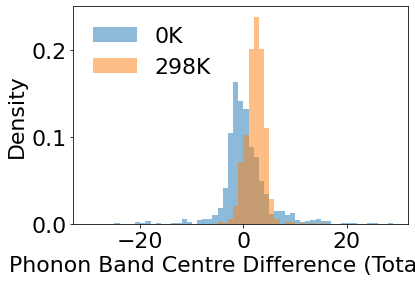

In [176]:
fig, ax = plt.subplots()

ax.hist(d_fav, label='0K',alpha=0.5, density=True, bins=np.arange(-30, 30))
ax.hist(d_favRT, label='298K',alpha=0.5, density=True, bins=np.arange(-30, 30))
ax.set_xlabel('Phonon Band Centre Difference (Total - Li)', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.legend(frameon=False, ncol=1, fontsize=fs)
plt.show()

### Scatter plots

In [177]:
d_list = [d_fav, d_favRT]
xtitle = ['Phonon band centre difference [THz]', 'Phonon band centre difference at room temperature [THz]']
fn_suffix = ['', 'rt']

for j, descriptor in enumerate(d_list):
    #store feature vector into dataframe
    df = pd.DataFrame(columns = ['Index','Phonon Band Centre Difference [THz]'])
    df['Index'] = mat_idx
    df['Phonon Band Centre Difference [THz]'] = descriptor
    #add formulaes to be able to analyse later
    formulaes = []
    for i in [*range(0, s)]:
        formulaes.append(data.loc[i,'formula_pretty_reduced'])
    df['Formula'] = formulaes
    #add conductivity labels
    conductivity = []
    conductivity_log = []
    conductivity_verbose = []
    for i in [*range(0, s)]:
        conductivity.append(data.loc[i,'σ(RT)(S cm-1)'])
        conductivity_log.append(np.log(data.loc[i,'σ(RT)(S cm-1)']))
        if data.loc[i,'Conductor?'] == True:
            conductivity_verbose.append('Yes')
        elif data.loc[i,'Conductor?'] == False:
            conductivity_verbose.append('No')
        else:
            conductivity_verbose.append('Unknown')
    df['σ(RT)(S cm-1)'] = conductivity
    df['log[σ(RT)(S cm-1)]'] = conductivity_log
    df['Conductor?'] = conductivity_verbose

    #histograms
    bin_max = max(df['Phonon Band Centre Difference [THz]'])
    bin_min = min(df['Phonon Band Centre Difference [THz]'])
    bin_range = bin_max-bin_min
    bins_num = int(bin_range*2)
    print(bins_num)
    
    #histograms
    hist = px.histogram(df, x='Phonon Band Centre Difference [THz]', nbins = bins_num,
                        color='Conductor?', color_discrete_sequence=['dodgerblue', 'limegreen', 'tomato'])
    hist.update_layout(autosize=False, height=500, width=700,
                       yaxis=dict(title_text="Count", titlefont=dict(size=fs), tickfont=dict(size=fs),
                                  showgrid=True),
                       yaxis_range=[0, 210],
                       xaxis=dict(title_text=xtitle[j], titlefont=dict(size=fs), tickfont=dict(size=fs)),
                       xaxis_range=[-25,29],
                       legend=dict(title_text="Ionic Conductor?",font=dict(size=fs), 
                                   yanchor='top', y=0.96, xanchor='right', x=0.96,
                                   bgcolor='rgba(1, 1, 1, 0.0)'),
                       showlegend=False)

    #scatter
    fig = px.scatter(df, x='Phonon Band Centre Difference [THz]', y='Index', 
                     color='Conductor?', hover_data=['σ(RT)(S cm-1)', 'Formula'],
                     color_discrete_sequence=['dodgerblue', 'limegreen', 'tomato'])

    fig.update_traces(marker=dict(size=6,
                                  line=dict(width=0.3,
                                            color='DarkSlateGrey')),
                      selector=dict(mode='markers'))

    fn = 'distrib_pbcdiff_'+fn_suffix[j]+'.pdf'
    hist.write_image(fn)
    #fig.write_html('clustering.html')
    hist.show()
    #fig.show()

118


38


In [178]:
for descriptor in ['d_fav', 'd_favRT']:
    top_10 = data.nlargest(20, descriptor)
    bottom_10 = data.nsmallest(20, descriptor)
    df_top = top_10[['formula_pretty_reduced', 'spacegroup_symbol', descriptor, 'σ(RT)(S cm-1)']]
    df_bottom = bottom_10[['formula_pretty_reduced', 'spacegroup_symbol', descriptor, 'σ(RT)(S cm-1)']]
    print('Top 10:')
    print(df_top)
    print('Lowest 10:')
    print(df_bottom)

Top 10:
    formula_pretty_reduced spacegroup_symbol      d_fav  σ(RT)(S cm-1)
662            Na2Li(H2N)3            P4_2/m  28.537854            NaN
29                 Li(BH)5            P6_422  25.191964            NaN
837             CsLi(H2N)2            P6_222  24.757322            NaN
215               LiMgH6Ir             P-43m  21.314584            NaN
305                LiH2ClO              Cmcm  20.667614   1.000000e-08
55            LiAsH6(OF2)3            P6_3mc  19.732810            NaN
586            LiUP(H4O5)2              P4/n  16.650866            NaN
614                 LiBeH3            P2_1/c  16.252526            NaN
45                  LiBeH3              C2/c  16.014076            NaN
34                  LiAlH4            I4_1/a  15.563288            NaN
717              LiMg2H7Ru          P6_3/mmc  15.424733            NaN
806                 LiBeH3              Cmcm  15.211447            NaN
535              LiB(HO2)2            P2_1/c  14.622052            Na

In [179]:
for descriptor in ['d_fav']:
    df_neg = data[data[descriptor]>=12]
    df_out = df_neg[['material_id', 'formula_pretty_reduced', descriptor]]
    
    print(df_out)
    df_out.to_csv('pbc_diff_unknown_plus.csv')

    material_id formula_pretty_reduced      d_fav
29    mp-941221                Li(BH)5  25.191964
34    mp-976291                 LiAlH4  15.563288
45    mp-977298                 LiBeH3  16.014076
55    mp-556562           LiAsH6(OF2)3  19.732810
125   mp-638070                LiB13C2  14.258713
157   mp-697181             CsLi2(HO)3  12.925573
207   mp-504354             LiBi(PO3)4  12.201742
215   mp-866640               LiMgH6Ir  21.314584
277   mp-696057            LiMg4H13Os2  14.563998
290   mp-696949               Li3TeHO4  13.830019
305   mp-760502                LiH2ClO  20.667614
363   mp-571132            LiMg10AlH24  12.942469
366   mp-655591                LiB13C2  13.982584
400   mp-722890                Li3H6Ir  14.607115
442   mp-755891              CsLiH4SO5  14.601069
535   mp-698205              LiB(HO2)2  14.622052
586   mp-560246            LiUP(H4O5)2  16.650866
614   mp-570218                 LiBeH3  16.252526
616     mp-8204                LiAlB14  13.532448


In [180]:
for descriptor in ['d_fav']:
    df_neg = data[data[descriptor]<=-4]
    df_out = df_neg[['material_id', 'formula_pretty_reduced', descriptor]]
    
    print(df_out)
    df_out.to_csv('pbc_diff_unknown_minus.csv')

    material_id formula_pretty_reduced      d_fav
4      mp-24610              LiP(HO2)2 -16.802681
28    mp-569238                Cs3LiI4  -5.029538
33    mp-558728               Cs3Li2F5  -4.290156
59    mp-753277                 LiAgF2  -5.884696
78    mp-569055                CsLi2I3  -4.337859
88     mp-20187                LiInSe2  -4.333021
102   mp-703273              KBaLiZnF6  -4.449562
111    mp-16264                 LiCaSb  -4.001085
124    mp-20782                LiInTe2  -4.736425
130    mp-24199                  LiHF2 -24.292323
136    mp-23662               LiB(HO)4 -20.991312
177   mp-567628             Rb2LiDyBr6  -4.056257
178    mp-24148               LiLa2HO3 -18.798028
209    mp-14854         Sr2LiIn(B2O5)2 -11.783523
212     mp-6499                BaLiBO3 -11.610104
220    mp-24411               K2LiAlH6  -8.646948
248    mp-31096                Li3AlH6  -7.966601
282   mp-556237                 KLiYF5  -4.340992
286   mp-553988                Cs2LiF3  -6.343473


# First peak

In [181]:
ff005 = first_peak_005
ff01 = first_peak_01
ff02 = first_peak_02
ff03 = first_peak_03
ff04 = first_peak_04
ff05 = first_peak_05
ff06 = first_peak_06

### Distribution

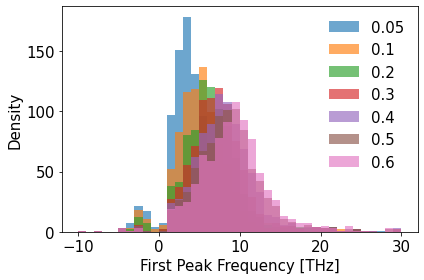

In [182]:
a = 0.65

bins = np.arange(-10, 31, 1)
labels = ['0.05', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
          'tab:purple', 'tab:brown', 'tab:pink']


fig, ax = plt.subplots()
for i, ff in enumerate([ff005, ff01, ff02, ff03, ff04, ff05, ff06]):
    ax.hist(ff, alpha=a, density=False, bins=bins, label=labels[i])
    #ax.axvline(np.array([f[0] for f in ff]).mean(), color=colors[i], linestyle=':')
    
ax.set_xlabel('First Peak Frequency [THz]', fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=15, frameon=False, loc='upper right')
plt.tight_layout()
plt.savefig('peak_hyperparam_distrib.pdf')
plt.show()

### Scatter plots

In [183]:
d_list = [ff005, ff01, ff02, ff03, ff04, ff05, ff06]
xtitle = ['Small Li first peak [THz]', 'Small Li first peak [THz]', 
          'Small Li first peak [THz]', 
          'Medium Li first peak [THz]', 'Medium Li first peak [THz]', 
          'Large Li first peak [THz]', 'Large Li first peak [THz]']
fn_suffix = ['small005', 'small01', 'small02', 'mid03', 'mid04', 'large05', 'large06']

for j, descriptor in enumerate(d_list):
    #store feature vector into dataframe
    df = pd.DataFrame(columns = ['Index','First Peak [THz]'])
    df['Index'] = mat_idx
    df['First Peak [THz]'] = descriptor
    #add formulaes to be able to analyse later
    formulaes = []
    for i in [*range(0, s)]:
        formulaes.append(data.loc[i,'formula_pretty_reduced'])
    df['Formula'] = formulaes
    #add conductivity labels
    conductivity = []
    conductivity_log = []
    conductivity_verbose = []
    for i in [*range(0, s)]:
        conductivity.append(data.loc[i,'σ(RT)(S cm-1)'])
        conductivity_log.append(np.log(data.loc[i,'σ(RT)(S cm-1)']))
        if data.loc[i,'Conductor?'] == True:
            conductivity_verbose.append('Yes')
        elif data.loc[i,'Conductor?'] == False:
            conductivity_verbose.append('No')
        else:
            conductivity_verbose.append('Unknown')
    df['σ(RT)(S cm-1)'] = conductivity
    df['log[σ(RT)(S cm-1)]'] = conductivity_log
    df['Conductor?'] = conductivity_verbose

    #histograms
    bin_max = max(df['First Peak [THz]'])
    bin_min = min(df['First Peak [THz]'])
    bin_range = (bin_max-bin_min)*2
    bins_num = int(bin_range)
    print(bins_num)
    
    #histograms
    hist = px.histogram(df, x='First Peak [THz]', nbins = bins_num,
                        color='Conductor?', color_discrete_sequence=['dodgerblue', 'limegreen', 'tomato'])
    hist.update_layout(autosize=False, height=500, width=700,
                       yaxis=dict(title_text="Count", titlefont=dict(size=fs), tickfont=dict(size=fs),
                                  showgrid=True),
                       yaxis_range=[0, 130],
                       xaxis=dict(title_text=xtitle[j], 
                                  titlefont=dict(size=fs), tickfont=dict(size=fs)),
                       xaxis_range=[-10,45],
                       legend=dict(title_text="Ionic Conductor?",font=dict(size=fs), 
                                   yanchor='top', y=0.96, xanchor='right', x=0.96,
                                   bgcolor='rgba(1, 1, 1, 0.0)'),
                       showlegend=False)


    #scatter
    fig = px.scatter(df, x='First Peak [THz]', y='Index', 
                     color='Conductor?', hover_data=['σ(RT)(S cm-1)', 'Formula'],
                     color_discrete_sequence=['dodgerblue', 'limegreen', 'tomato'])

    fig.update_traces(marker=dict(size=6,
                                  line=dict(width=0.3,
                                            color='DarkSlateGrey')),
                      selector=dict(mode='markers'))

    fn = 'distrib_fpeak_'+fn_suffix[j]+'.pdf'
    hist.write_image(fn)
    #fig.write_html('clustering.html')
    hist.show()
    #fig.show()

105


87


87


243


243


243


243


In [184]:
for descriptor in ['0.2', '0.5', '0.6']:
    top_10 = data.nlargest(10, descriptor)
    bottom_10 = data.nsmallest(20, descriptor)
    df_top = top_10[['formula_pretty_reduced', 'spacegroup_symbol', descriptor, 'σ(RT)(S cm-1)']]
    df_bottom = bottom_10[['formula_pretty_reduced', 'material_id', descriptor, 'σ(RT)(S cm-1)']]
    print('Top 10:')
    print(df_top)
    print('Lowest 10:')
    print(df_bottom)

Top 10:
    formula_pretty_reduced spacegroup_symbol        0.2  σ(RT)(S cm-1)
130                  LiHF2              R-3m  34.215945            NaN
757               LiNd2HO3              Immm  30.021208            NaN
4                LiP(HO2)2            Pna2_1  29.153401            NaN
411               LiB2H3O5              Pnna  29.032108            NaN
136               LiB(HO)4              Pbca  24.779915            NaN
517                    LiH             Fm-3m  24.192959            NaN
746                KLiBeF4              P6_3  23.748727            NaN
324                SrLiBO3            P2_1/c  22.111469            NaN
212                BaLiBO3            P2_1/c  21.892087            NaN
178               LiLa2HO3              Immm  21.699704            NaN
Lowest 10:
    formula_pretty_reduced material_id       0.2  σ(RT)(S cm-1)
559               Cs2LiNF6   mp-989536 -9.582517            NaN
89               LiNb13O33   mp-772535 -7.303432            NaN
321     

In [185]:
df_neg_small = data[data['0.1']<=0]
df_out_small = df_neg_small[['material_id', 'formula_pretty_reduced', '0.2']]

df_out_small

,material_id,formula_pretty_reduced,0.2
35,mp-557969,LiLa2S2O8F3,-2.405614
75,mp-557962,SrLiBS3,-1.514451
82,mp-752768,LiAgF4,0.893545
89,mp-772535,LiNb13O33,-7.303432
110,mp-6597,CsLiSO4,1.137042
165,mp-849779,LiSi6BiO14,-4.272276
181,mp-559708,Li6ZrBeF12,-3.469315
187,mp-31488,Li3NbO4,3.213445
191,mp-13182,Li2TiGeO5,-2.125617
246,mp-39387,SrLiTa2O6F,-4.813808


In [186]:
df_neg_large = data[data['0.5']<=0]
df_out_large = df_neg_large[['material_id', 'formula_pretty_reduced', '0.5']]
df_out_large

,material_id,formula_pretty_reduced,0.5
35,mp-557969,LiLa2S2O8F3,-2.405614
89,mp-772535,LiNb13O33,-7.303432
165,mp-849779,LiSi6BiO14,-4.272276
246,mp-39387,SrLiTa2O6F,-4.813808
247,mp-753327,LiSiBiO4,-2.389002
321,mp-985582,Li6PS5I,-4.857220
351,mp-555002,LiEr2S2O8F3,-2.804818
415,mp-776108,LiNbO3,-2.714737
424,mp-585305,Li9Bi3P8O29,-3.948464
559,mp-989536,Cs2LiNF6,-9.582517


In [187]:
df_out = pd.merge(df_out_small, df_out_large, on=['material_id', 'formula_pretty_reduced'], how='outer')
print(df_out)
df_out.to_csv('first_peak_candidates.csv')

   material_id formula_pretty_reduced       0.2       0.5
0    mp-557969            LiLa2S2O8F3 -2.405614 -2.405614
1    mp-557962                SrLiBS3 -1.514451       NaN
2    mp-752768                 LiAgF4  0.893545       NaN
3    mp-772535              LiNb13O33 -7.303432 -7.303432
4      mp-6597                CsLiSO4  1.137042       NaN
5    mp-849779             LiSi6BiO14 -4.272276 -4.272276
6    mp-559708             Li6ZrBeF12 -3.469315       NaN
7     mp-31488                Li3NbO4  3.213445       NaN
8     mp-13182              Li2TiGeO5 -2.125617       NaN
9     mp-39387             SrLiTa2O6F -4.813808 -4.813808
10   mp-753327               LiSiBiO4 -2.389002 -2.389002
11     mp-6332              Li2TiSiO5  3.434512       NaN
12   mp-696129           Li10Si(PS6)2 -2.550960       NaN
13   mp-696128           Li10Ge(PS6)2 -2.276746       NaN
14   mp-676650                Li6Br3N -2.260874       NaN
15   mp-985583                 Li3PS4  7.375250       NaN
16   mp-985582

In [188]:
df_diff = data[data['d_fav']<=-4]
df_peak = data[data['0.2']<=0]

df_match = pd.merge(df_diff, df_peak, on=['material_id'], how='inner')


df_match

,Unnamed: 0.1_x,Unnamed: 0_x,material_id,elements_x,formula_pretty_reduced_x,formula_x,icsd_id_x,num_elements_x,chemsys_x,spacegroup_symbol_x,...,0.5_y,0.6_y,1e-05_y,0.0001_y,0.001_y,0.01_y,σ(RT)(S cm-1)_y,Conductor?_y,d_fav_y,d_favRT_y


# Relative spread

### Distributions

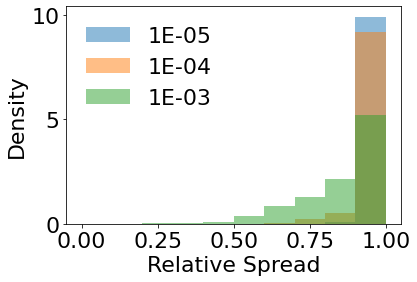

In [189]:
fig, ax = plt.subplots()
ax.hist(rel_s_05, alpha=0.5, density=True, bins=np.arange(0, 1.1, 0.1), label='1E-05')
ax.hist(rel_s_04, alpha=0.5, density=True, bins=np.arange(0, 1.1, 0.1), label='1E-04')
ax.hist(rel_s_03, alpha=0.5, density=True, bins=np.arange(0, 1.1, 0.1), label='1E-03')
#ax.hist(rel_s_02, alpha=0.5, density=True, bins=np.arange(0, 1.1, 0.1), label='1E-02')
ax.set_xlabel('Relative Spread', fontsize=fs)
ax.set_ylabel('Density', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.legend(fontsize=fs, frameon=False)
plt.show()

### Scatter plots

In [190]:
rel_s_03_up = []
for spread in rel_s_03:
    if spread[0]>1:
        rel_s_03_up.append(1)
    else:
        rel_s_03_up.append(spread[0])

for descriptor in [rel_s_03_up]:#, rel_s_04, rel_s_03]:
    #store feature vector into dataframe
    df = pd.DataFrame(columns = ['Index','Relative Spread'])
    df['Index'] = mat_idx
    df['Relative Spread'] = descriptor
    #add formulaes to be able to analyse later
    formulaes = []
    for i in [*range(0, s)]:
        formulaes.append(data.loc[i,'formula_pretty_reduced'])
    df['Formula'] = formulaes
    #add conductivity labels
    conductivity = []
    conductivity_log = []
    conductivity_verbose = []
    for i in [*range(0, s)]:
        conductivity.append(data.loc[i,'σ(RT)(S cm-1)'])
        conductivity_log.append(np.log(data.loc[i,'σ(RT)(S cm-1)']))
        if data.loc[i,'Conductor?'] == True:
            conductivity_verbose.append('Yes')
        elif data.loc[i,'Conductor?'] == False:
            conductivity_verbose.append('No')
        else:
            conductivity_verbose.append('Unknown')
    df['σ(RT)(S cm-1)'] = conductivity
    df['log[σ(RT)(S cm-1)]'] = conductivity_log
    df['Conductor?'] = conductivity_verbose

    #histogram
    hist = px.histogram(df, x='Relative Spread', 
                        color='Conductor?', color_discrete_sequence=['dodgerblue', 'limegreen', 'tomato'],
                        hover_data=['Formula'])
    hist.update_layout(autosize=False, height=500, width=700,
                       yaxis=dict(title_text="Count", titlefont=dict(size=fs), tickfont=dict(size=fs),
                                  showgrid=True),
                       xaxis=dict(title_text='Relative spread', 
                                  titlefont=dict(size=fs), tickfont=dict(size=fs)),
                       legend=dict(title_text="Ionic Conductor?",font=dict(size=fs), 
                                   yanchor='top', y=0.96, xanchor='right', x=0.96,
                                   bgcolor='rgba(1, 1, 1, 0.0)'),
                       showlegend=False)

    #scatter
    fig = px.scatter(df, x='Relative Spread', y='Index', 
                     color='Conductor?', hover_data=['σ(RT)(S cm-1)', 'Formula'],
                     color_discrete_sequence=['dodgerblue', 'limegreen', 'tomato'])

    fig.update_traces(marker=dict(size=6,
                                  line=dict(width=0.3,
                                            color='DarkSlateGrey')),
                      selector=dict(mode='markers'))

    fn = 'distrib_spread_05.pdf'
    hist.write_image(fn)
    #fig.write_html('clustering.html')
    hist.show()
    #fig.show()

In [191]:
for descriptor in ['0.001']:
    bottom_10 = data.nsmallest(75, descriptor)
    df_bottom = bottom_10[['formula_pretty_reduced', 'spacegroup_symbol', descriptor, 'σ(RT)(S cm-1)']]
    print('Lowest 10:')
    print(df_bottom)

Lowest 10:
    formula_pretty_reduced spacegroup_symbol     0.001  σ(RT)(S cm-1)
177             Rb2LiDyBr6             Fm-3m  0.208000            NaN
151             Cs2LiLuCl6             Fm-3m  0.266667            NaN
215               LiMgH6Ir             P-43m  0.294872            NaN
546                 LiCrS2             P-3m1  0.322981            NaN
681             Rb2LiTlCl6             Fm-3m  0.333333            NaN
..                     ...               ...       ...            ...
401            LiAl2H6ClO6          P6_3/mcm  0.659574            NaN
8                 LiInP2O7              P2_1  0.660550            NaN
39             LiTi2(PO4)3              R-3c  0.661290       0.000008
379                CsLiCl2            P4/nmm  0.662252            NaN
508               Li2B2Se5              C2/c  0.663462            NaN

[75 rows x 4 columns]
